# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd

#### Read 'gold_price_usd.csv' & store it in a variable

In [3]:
df=pd.read_csv('gold_price_usd.csv')
df

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


#### View the first 5 rows

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [4]:
df.head(5)

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

Index(['Date', 'USD (AM)'], dtype='object')

In [7]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


In [36]:
df = df.rename(columns={'USD(AM)': 'Price'})

#### Check if there are any missing values in the dataset

Date      0
Price     0
Year      0
Months    0
dtype: int64

In [32]:
df.isnull().sum()

Date     0
Price    0
Year     0
Month    0
dtype: int64

#### Gather the basic statistical information about the dataset

,Price,Year,Months
count,4718.000000,4718.000000,4718.000000
mean,959.990812,2009.839339,6.456761
std,449.456217,5.392467,3.426217
min,256.700000,2001.000000,1.000000
25%,449.112500,2005.000000,3.000000
50%,1113.125000,2010.000000,6.000000
75%,1293.750000,2014.750000,9.000000
max,1896.500000,2019.000000,12.000000


In [33]:
df.describe()

,Date,Price,Year,Month
count,4718,4718.000000,4718.000000,4718.000000
mean,2010-05-02 05:47:56.642645504,959.990812,2009.839339,6.456761
min,2001-01-02 00:00:00,256.700000,2001.000000,1.000000
25%,2005-09-01 06:00:00,449.112500,2005.000000,3.000000
50%,2010-05-02 00:00:00,1113.125000,2010.000000,6.000000
75%,2015-01-01 12:00:00,1293.750000,2014.750000,9.000000
max,2019-09-02 00:00:00,1896.500000,2019.000000,12.000000
std,NaN,449.456217,5.392467,3.426217


#### Convert Date column from object to datetime format

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Month   4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


In [37]:
df['Year'] = df['Date'].apply(lambda x: x.year)

#### Create a new column with Months

In [38]:
df['Month'] = df['Date'].apply(lambda x: x.month)

In [39]:
df

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1
...,...,...,...,...
4713,2019-08-27,1531.85,2019,8
4714,2019-08-28,1541.75,2019,8
4715,2019-08-29,1536.65,2019,8
4716,2019-08-30,1526.55,2019,8


#### See all the years and Months in our dataset

In [28]:
#Years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [88]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [29]:
#Months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [89]:
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

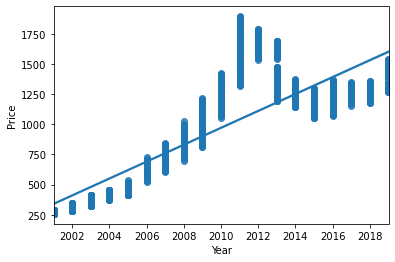

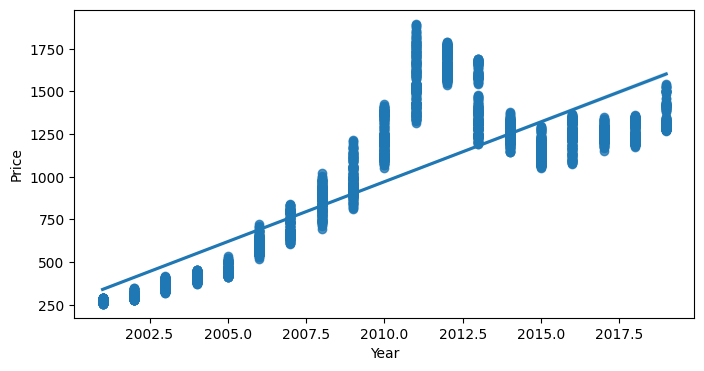

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,4))
sns.regplot(x = 'Year', y = 'Price',data=df)
plt.show()

### Plot a histplot to find the variation in price

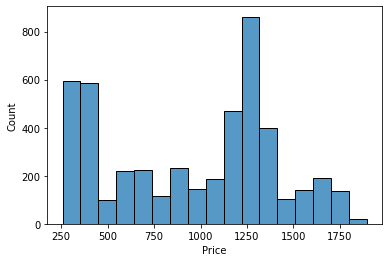

<Axes: xlabel='Price', ylabel='Count'>

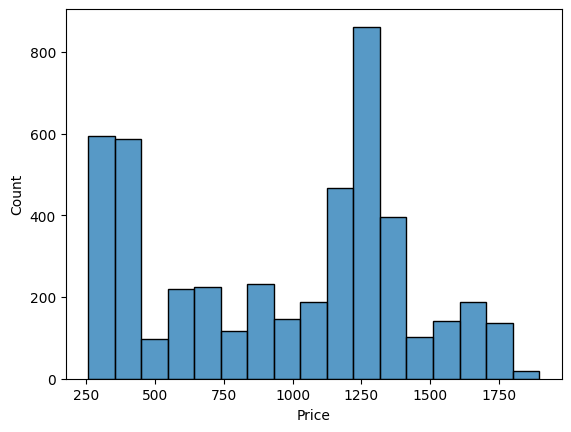

In [44]:
sns.histplot(x='Price',data=df)

### Assign year and price in x and y variables

In [55]:
X = df[['Year']]
y = df['Price']
X


,Year
0,2001
1,2001
2,2001
3,2001
4,2001
...,...
4713,2019
4714,2019
4715,2019
4716,2019


In [49]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.9 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.9 MB 6.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.9 MB 5.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.9 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.9 MB 7.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/10.9 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/10.9 MB 7.7 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/10.9 MB 7.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/10.9 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.9 MB 7.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/10.9 MB 7.8 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [50]:
# import train_test split
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [56]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
train_test_split


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3302, 1)
(3302,)
(1416, 1)
(1416,)


### Create Linear Regression Model

In [59]:
lr=LinearRegression()

### Train the  model

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

### Check the score of our model

In [61]:
lr.score(X_train,y_train)

0.7048691960223047

### Check the coefficient and Intercept

In [65]:
#print the intercept

print(lr.intercept_)

-140074.32374779318


In [66]:
#print the coefficent
print(lr.coef_)

[70.17366927]


### Make Prediction with Test data

In [67]:
# Also store the predicted values in a variable
pre=lr.predict(X_test)

### Create a new dataframe with actual and predicted values with year(X_test) as index

,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


In [71]:
new_df= pd.DataFrame({'Year': X_test['Year'],  
                         'y_test': y_test,
                         'Prediction': pre})
new_df.set_index('Year',inplace=True)
new_df

,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
# Mean absolute error


186.2427389387367

In [76]:
cal1 = (new_df['y_test'] - new_df['Prediction']).abs().mean()
print(cal1)

186.2427389387411


In [116]:
# Mean squared error


58032.97376893121

In [79]:
cal2 = ((new_df['y_test'] - new_df['Prediction'])**2).mean()
print(cal2)

58032.97376893168


### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

,Price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


In [92]:
import numpy as np
new=pd.DataFrame(lr.predict(np.array([2025, 2026, 2027, 2028, 2030]).reshape(-1,1)),index=[2025, 2026, 2027, 2028, 2030]).rename({0:'Price'},axis=1)
new

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


***

# <span style = "color:green;font-size:40px"> Great Job!</span>